# Requerimentos

In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
import cv2 as cv
import matplotlib.pyplot as plt

# Classes

In [2]:
class Plot():
    '''
    Classe que plota imagens com base no esquema rgb de cores e compara duas imagens entre si.

    Parâmetros:
        image (numpy.ndarray): Imagem de interesse.

    Atributos:
        image (numpy.ndarray): Onde a imagem é salva.
    '''
    def __init__(self, image):
        self.image = image

        
    def show_img(self, title, figsize):
        '''Método para visualizar a imagem, definindo título e tamanho.

        Parâmetros:
            title (str): Título de interesse para acompanhar a imagem.
            figsize (tuple): Tupla de inteiros de tamanho 2, que define o tamanho da imagem.
            
        Returns:
            plt: A função plota a imagem com título e tamanho desejado.
        '''
        # Tamanho da figura
        fig = plt.figure(figsize=figsize)
        
        # Plota imagem com seu respectivo título
        plt.imshow(cv.cvtColor(self.image, cv.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
        plt.show()
                
        
    def compare_img(self, img2, title, figsize):
        '''Método para plotar uma imagem comparando o antes e o depois da aplicação do processamento de imagem,
        com seus respectivos títulos e tamanho desejados.
        
        Parâmetros:
            img2 (numpy.ndarray): Imagem para comparar com o atributo imagem.
            title (list): Lista de título, sendo o primeiro e segundo respectivos a image e img2 respectivamente.
            figsize (tuple): Tupla de inteiros de tamanho 2, que define o tamanho da imagem.
        
        Returns:
            plt: A função plota as duas imagens com título e tamanho desejado.
        '''
        #tamanho da figura
        fig = plt.figure(figsize=figsize)

        # Divisão dos espaços da figura conforme matriz 2x1
        grid = plt.GridSpec(2, 1, hspace=0.1, wspace=0.3)
        
        # Plot da primeira imagem, junto com título
        plt.subplot(grid[0, 0])
        plt.imshow(cv.cvtColor(self.image, cv.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(title[0])
        
        # Plot da segunda imagem, junto com título
        plt.subplot(grid[1, 0])
        plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(title[1])
        
        plt.show()
        
        
class Quantitaze():
    '''Classe para fazer a Quantização de uma imagem, dado um número de cores.

    Parâmetros:
        image (numpy.ndarray): Imagem de interesse.

    Atributos:
        image (numpy.ndarray): Onde a imagem é salva.
    '''
    def __init__(self, image):
        self.image = image
        
        
    def num_colors(self, num_colors):
        '''
        Método para quantizar as cores.

        Parâmetros:
            num_colors (int): Quantidade de cores para quantitização.

        Return:
            img_clusters (numpy.ndarray): Imagem quantizada, isto é, com as cores.
        '''
        img_normal = np.reshape(self.image, (-1, 3))
        img_normal = img_normal / 255

        # Ajuste e treinamento do modelo;
        img_train = shuffle(img_normal)
        kmeans = KMeans(n_clusters=num_colors).fit(img_train)
        labels = kmeans.predict(img_normal)
        centers = kmeans.cluster_centers_

        # Imagem quantizada 
        img_clusters = np.reshape(centers[labels], self.image.shape)
        
        #restauração para o padrão uint8
        img_clusters = np.uint8(img_clusters*255)

        return img_clusters

    def teste_cotovelo(self, num):
        """Teste do cotovelo: Avalia o número ideial de clusters para o algoritmo kmeans.

        Parâmetros:
            num (int): Número de valores que serão testados e plotados pelo teste.

        Return:
            (plt): Gráfico com a curva do cotovelo.
        """

        wcss = []
        img_normal = np.reshape(self.image, (-1, 3))
        img_normal = img_normal / 255

        # Ajuste e treinamento do modelo;
        img_train = shuffle(img_normal)
        
        #Avaliação de como as quantidades de clusters se comportam entre 1 e num
        for i in range(1, num):
            kmeans = KMeans(n_clusters=i, max_iter=300,
                            n_init=10, random_state=0)
            kmeans.fit(img_train)
            wcss.append(kmeans.inertia_)

        plt.plot(range(1, num), wcss)
        plt.title('Curva de Cotovelo')
        plt.xlabel('Numero de Clusters')
        plt.ylabel('WCSS')
        plt.show()

# Transformando uma imagem em pintura com Python

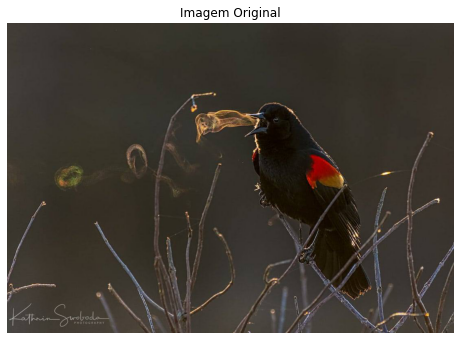

In [3]:
image = cv.imread('bird_3.jpg')
Plot(image).show_img('Imagem Original', (8,6))

## Processamento da imagem colorida

### Quantização de cores

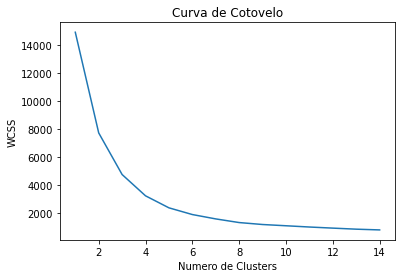

In [4]:
Quantitaze(image).teste_cotovelo(15)

A curva do cotovelo apesar de ser um teste útil para indicar a quantidade de cluster, neste caso específico não é muito bom, já que a quantidade ideal vai variar com o total de cores que tem na imagem, então imagens com uma paleta de cores menos variadas deve receber mais clusters, enquanto que imagens com uma paleta de cores mais variadas deve receber menos clusters.

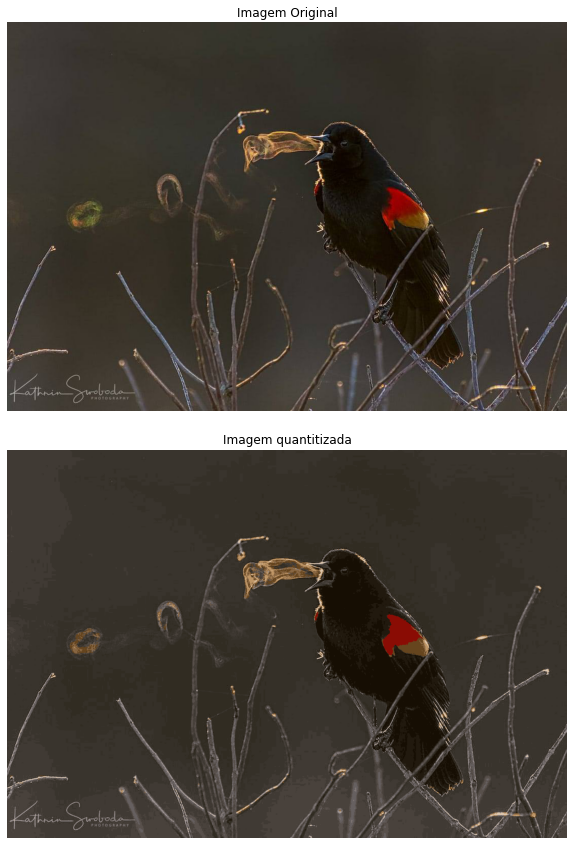

In [5]:
img_clusters = Quantitaze(image).num_colors(16)
Plot(image).compare_img(img_clusters,['Imagem Original', 'Imagem quantitizada'], (25,15))

### Aplicação do filtro de média

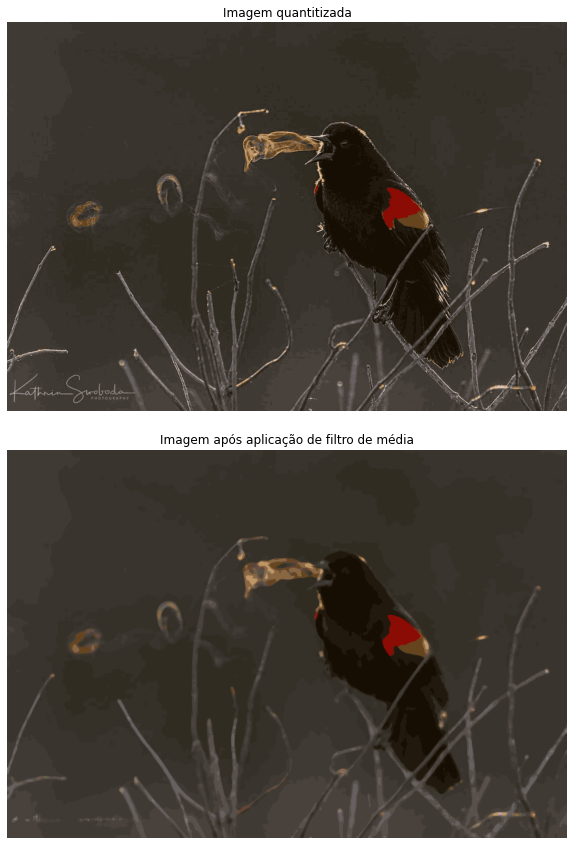

In [6]:
#Aplicação de filtro de média sobre a imagem "img_clusters";
median_color = cv.medianBlur(img_clusters, 9)
Plot(img_clusters).compare_img(median_color,['Imagem quantitizada', 'Imagem após aplicação de filtro de média'], (25,15))

## Processamento em tons de cinza

### Transformando a imagem original para uma imagem em tons de cinza

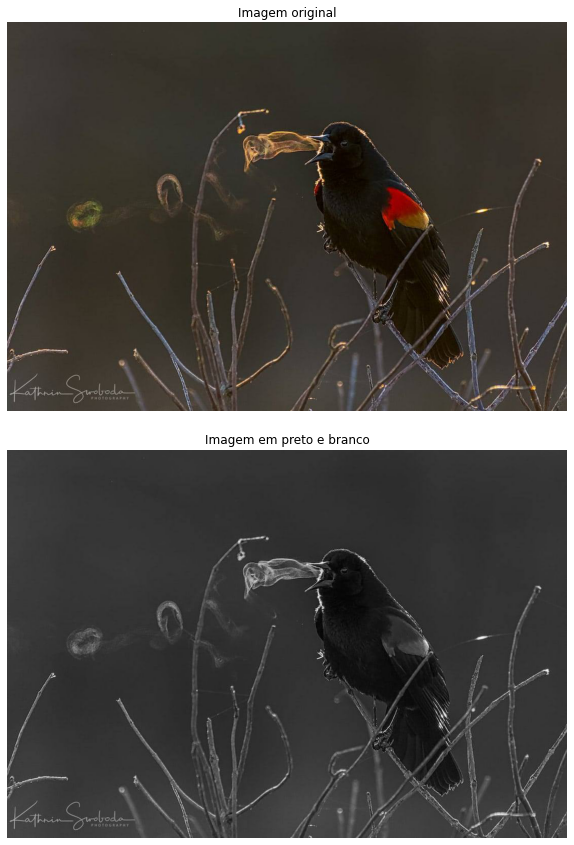

In [7]:
# Obtenção da imagem original em escalas de cinza;
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
Plot(image).compare_img(gray,['Imagem original', 'Imagem em preto e branco'], (25,15))

### Filtro de média

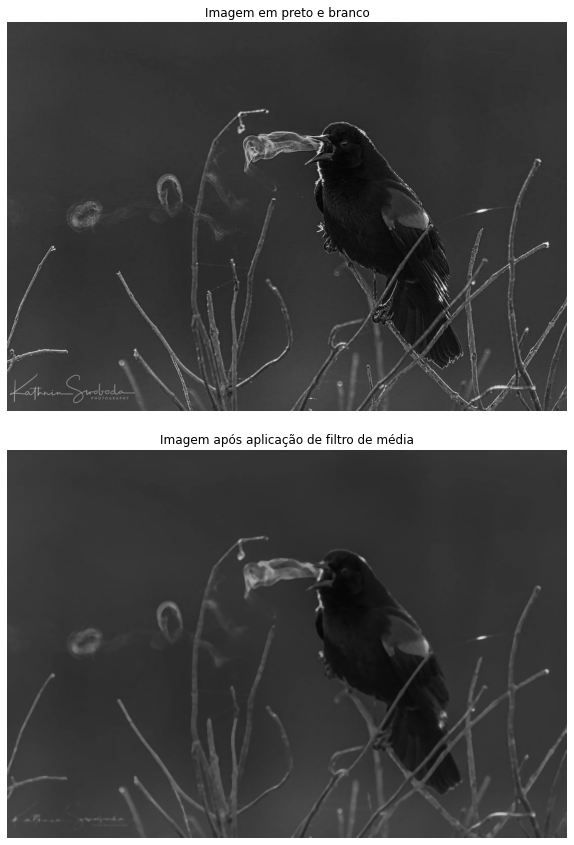

In [8]:
#Aplicação de filtro de média na imagem em escalas de cinza;
median_gray = cv.medianBlur(gray, 7)
Plot(gray).compare_img(median_gray,['Imagem em preto e branco', 'Imagem após aplicação de filtro de média'], (25,15))

### Aplicação do algoritmo Canny edge detector

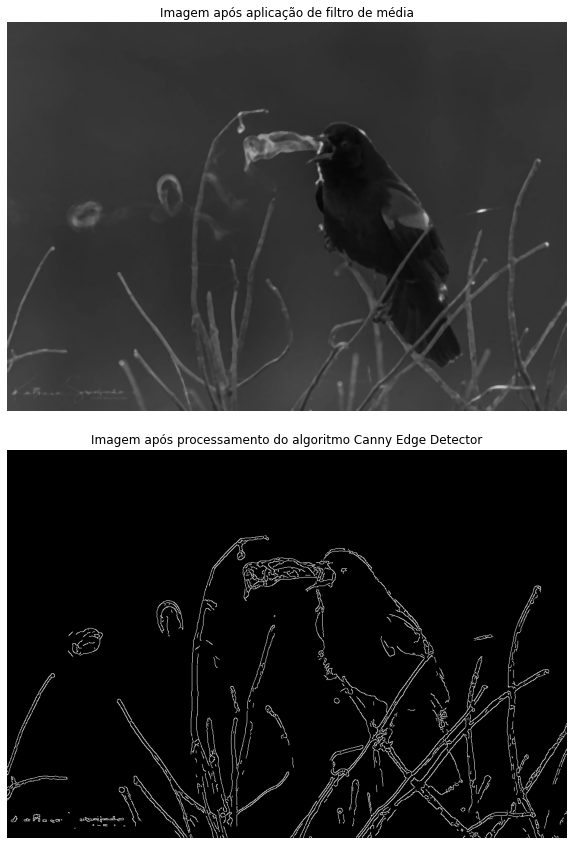

In [9]:
#Encontrar os contornos da imagem anterior;
edges = cv.Canny(median_gray,40,60)
Plot(median_gray).compare_img(edges,['Imagem após aplicação de filtro de média',
                                     'Imagem após processamento do algoritmo Canny Edge Detector'], (25,15))

### Dilatação

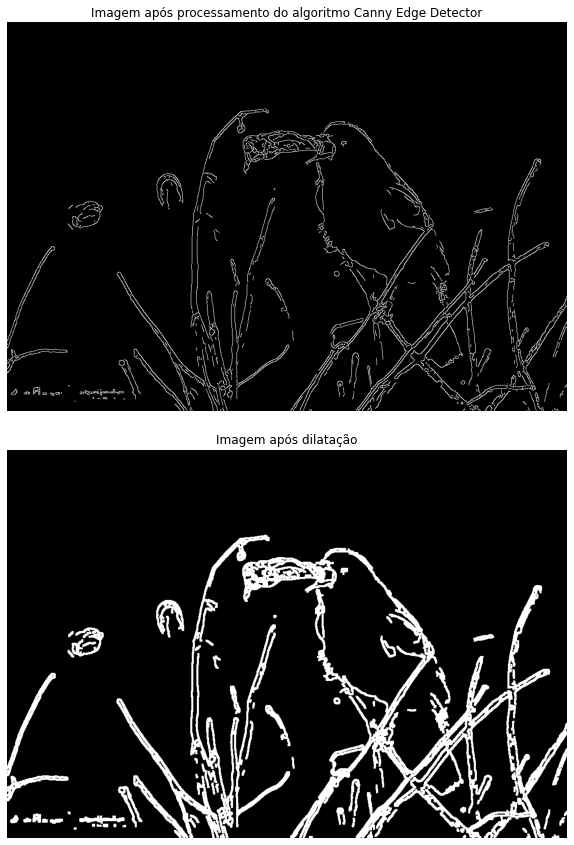

In [10]:
#Dilatar os contornos da imagem "edge" usando elemento estruturante 2x2;
kernel = np.ones((4,4), dtype='uint8')
dilation = cv.dilate(edges,kernel,iterations = 1)
Plot(edges).compare_img(dilation,['Imagem após processamento do algoritmo Canny Edge Detector',
                                'Imagem após dilatação'], (25,15))

### Invertendo as cores da imagem anterior

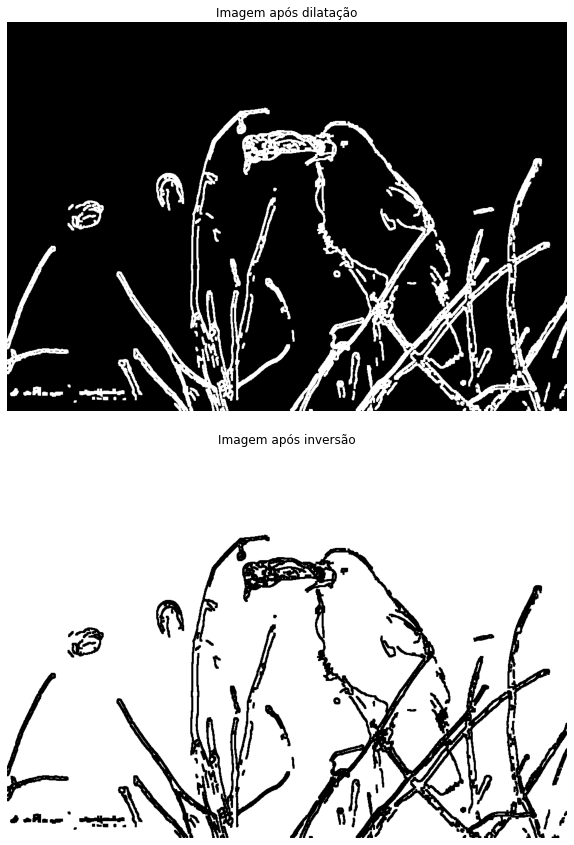

In [11]:
#Inversão das cores da imagem anterior;
dilation_inv = np.add(dilation,1)
dilation_inv = np.where(dilation_inv==1, 255, dilation_inv)
Plot(dilation).compare_img(dilation_inv,['Imagem após dilatação',
                                'Imagem após inversão'], (25,15))

## Combinando o processamento da imagem colorida com o da imagem em tons de cinza

### Colorindo as bordas da imagem anterior

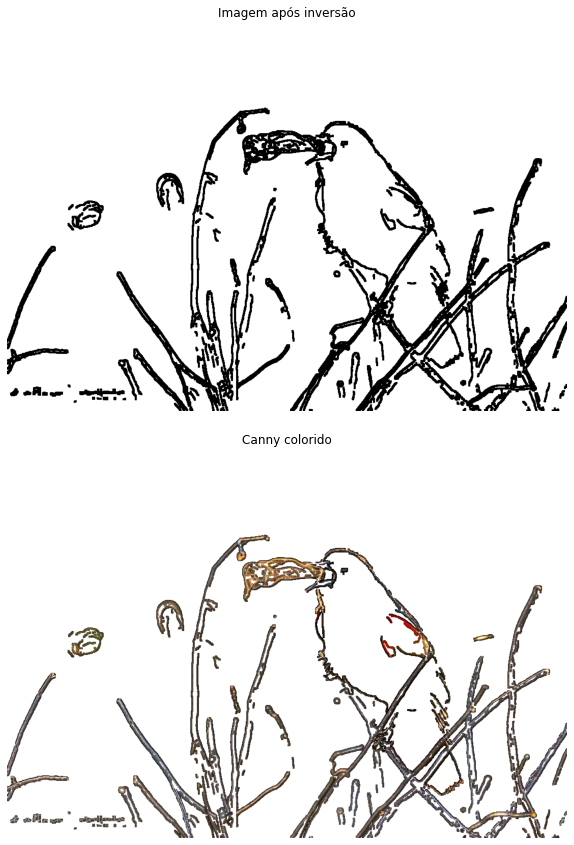

In [12]:
#Obtenção de imagem RGB da imagem "dilation_inv"; 
dilation_inv = cv.cvtColor(dilation_inv,cv.COLOR_GRAY2RGB)
zero = np.array([0,0,0],dtype='uint8')
# Obtenção da imagem "dilation_inv" colorida; essa parte é para ver apenas os contornos coloridos e é opcional;
color_canny = np.where(dilation_inv==zero, image, dilation_inv)
Plot(dilation_inv).compare_img(color_canny,['Imagem após inversão',
                                            'Canny colorido'], (25,15))

### Combinar a imagem anterior com o resultado do processamento da imagem colorida

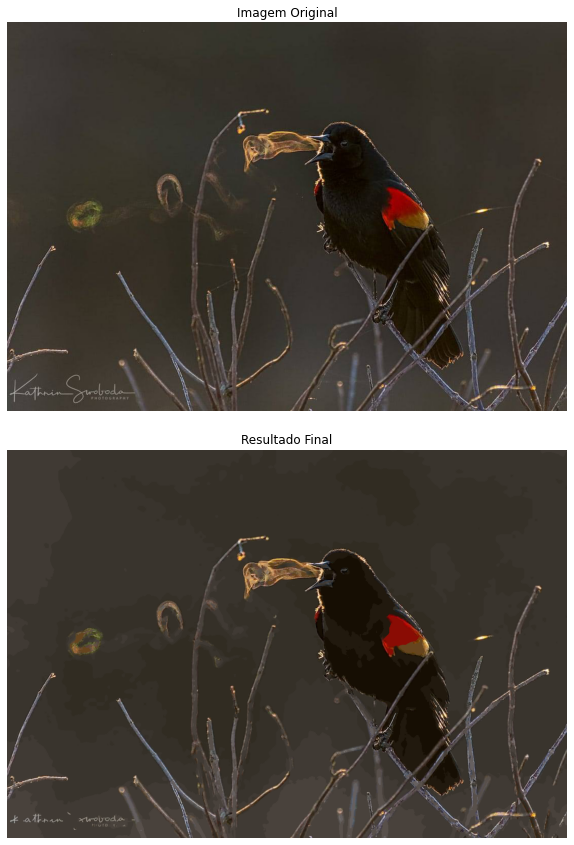

In [13]:
#Obtenção de resultado final, ao adicionar os contornos coloridos a imagem "median_color";
results = np.where(dilation_inv==zero, color_canny, median_color)

Plot(image).compare_img(results,['Imagem Original',
                                'Resultado Final'], (25,15))

# Resultado final

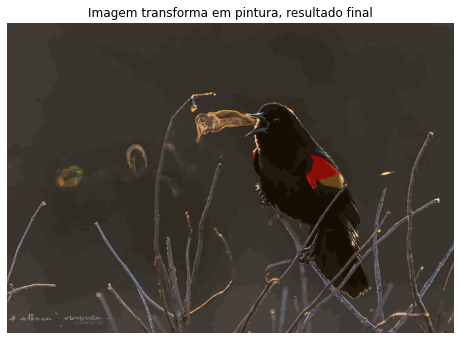

In [14]:
Plot(results).show_img('Imagem transforma em pintura, resultado final', (8,6))